In [40]:
import pandas as pd
raw = pd.read_csv('C:\\Users\Selfisher\Desktop\data.csv', '\t')
# this data contains the results from over 300,000 induviduals so it may take a moment or two.

In [41]:
raw.head(5) # Let's see how the data looks like

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [42]:
raw = raw.drop('age', axis=1).drop('engnat', axis=1).drop('race', axis=1).drop('hand', axis=1).drop('source', axis=1)
# droping these columns for now, but the country column might be relevant

In [43]:
raw.head(5)

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,US,4,2,5,2,5,1,4,3,...,4,1,3,1,5,1,4,2,5,5
1,2,US,2,2,3,3,3,3,1,5,...,3,3,3,3,2,3,3,1,3,2
2,2,PK,5,1,1,4,5,1,1,5,...,4,5,5,1,5,1,5,5,5,5
3,2,RO,2,5,2,4,3,4,3,4,...,4,3,5,2,4,2,5,2,5,5
4,2,US,3,1,3,3,3,1,3,1,...,3,1,1,1,3,1,3,1,5,3


In [44]:
countries = pd.DataFrame(raw['country'].value_counts())
countries.median() # there are alot of countries with very few subjects

country    10.0
dtype: float64

In [45]:
countries = countries.loc[countries['country'] >= 500]
countries.median()

country    1219.0
dtype: float64

In [46]:
len(countries) # so we're left with 6 countries

6

In [47]:
raw = raw.loc[raw['country'].isin(countries.index)] # keep only those countries

In [48]:
len(raw['country'].value_counts()) # seems like it worked!

6

Now the problem is that most skl algorithms dont know how to use strings for their predictions. So, we will split
the column 'country' into 48 columns of countries which will contain ones and zeros:
one if the subjecct is from the column's name (country)
or zero if not.
in each row there sould be exactly one "1".

In [49]:
raw['country'].str.get_dummies()

,AU,CA,GB,IN,PH,US
0,0,0,0,0,0,1
1,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,0,0,0,1
...,...,...,...,...,...,...
19712,0,0,0,0,0,1
19713,0,0,0,0,0,1
19715,0,0,0,0,0,1
19716,0,0,0,0,0,1


In [50]:
n_data = raw#.join(raw['country'].str.get_dummies(), how='right') # combining the two data frames into a n_data

In [51]:
n_data.head(5)

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,US,4,2,5,2,5,1,4,3,...,4,1,3,1,5,1,4,2,5,5
1,2,US,2,2,3,3,3,3,1,5,...,3,3,3,3,2,3,3,1,3,2
4,2,US,3,1,3,3,3,1,3,1,...,3,1,1,1,3,1,3,1,5,3
5,2,US,1,5,2,4,1,3,2,4,...,4,2,1,3,3,5,5,4,5,3
6,2,US,5,1,5,1,5,1,5,4,...,3,1,5,1,4,1,4,3,3,4


In [72]:
n_data = n_data.drop('country', axis=1) # we ahve no use for the 'country' column now

In [52]:
n_data.head(5) 

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,US,4,2,5,2,5,1,4,3,...,4,1,3,1,5,1,4,2,5,5
1,2,US,2,2,3,3,3,3,1,5,...,3,3,3,3,2,3,3,1,3,2
4,2,US,3,1,3,3,3,1,3,1,...,3,1,1,1,3,1,3,1,5,3
5,2,US,1,5,2,4,1,3,2,4,...,4,2,1,3,3,5,5,4,5,3
6,2,US,5,1,5,1,5,1,5,4,...,3,1,5,1,4,1,4,3,3,4


In [53]:
n_data['gender'] = n_data['gender'] - 1 # now 1 is female and 0 is male

In [267]:
n_data = n_data.loc[n_data['gender']!=2]

In [268]:
n_data = n_data.loc[n_data['gender']!=-1]

In [54]:
#n_data.iloc[:, 2:7] = (n_data.iloc[:, 2:7] * 2) ** 2 - 2

In [55]:
#n_data['agreeable_score'] = (n_data['agreeable_score'] * 2)** 3

In [56]:
#n_data['neuroticism_score'] = (n_data['neuroticism_score'] *2)** 2

In [57]:
n_data.head(5)

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,0,US,4,2,5,2,5,1,4,3,...,4,1,3,1,5,1,4,2,5,5
1,1,US,2,2,3,3,3,3,1,5,...,3,3,3,3,2,3,3,1,3,2
4,1,US,3,1,3,3,3,1,3,1,...,3,1,1,1,3,1,3,1,5,3
5,1,US,1,5,2,4,1,3,2,4,...,4,2,1,3,3,5,5,4,5,3
6,1,US,5,1,5,1,5,1,5,4,...,3,1,5,1,4,1,4,3,3,4


In [58]:
from sklearn.utils import shuffle

In [59]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [378]:
n_data = shuffle(n_data)

In [271]:
to = 2000
train = n_data[:to]
test = n_data[to:]

In [272]:
trainx = train.drop('gender',axis=1)
trainy = train['gender']

In [119]:
import sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB # best we got is 0.64 accuracy for 0.65 male to female ratio - not good

In [120]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier    # binarize=1.6)- for power trick binarize=0.65-no trick

In [217]:
reg = linear_model.SGDClassifier()                     

In [273]:
reg = linear_model.RidgeClassifierCV() # best so far 

In [304]:
score = cross_val_score(reg, trainx, trainy, cv=130)

In [305]:
score.mean()

0.6851602564102564

In [297]:
len(train.loc[train['gender'] == 0]) / len(train.loc[train['gender'] == 1])

0.5527950310559007

In [277]:
from matplotlib import pyplot as plt
import seaborn as sns

In [379]:
mal = n_data.loc[n_data['gender']==0]
fem = n_data.loc[n_data['gender']==1][:len(mal)]
plot_d = fem.append(mal)

In [380]:
len(fem)

5253

In [381]:
len(mal)

5253

C:\Users\Selfisher\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Selfisher\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Selfisher\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Selfisher\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Selfisher\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Selfisher\anacon

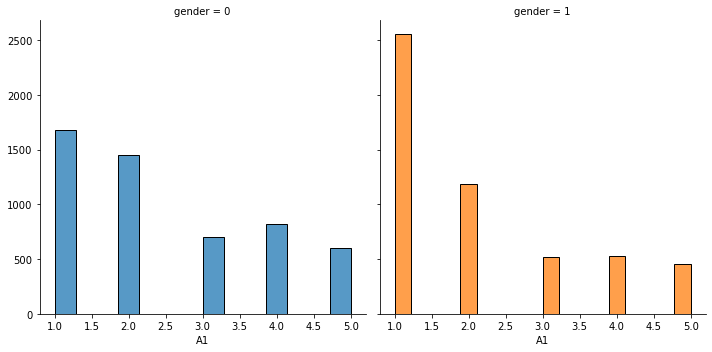

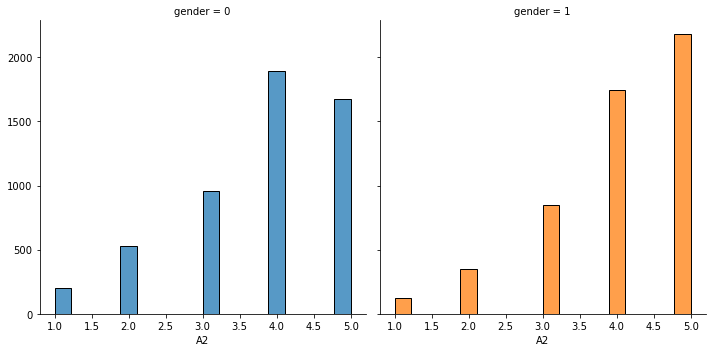

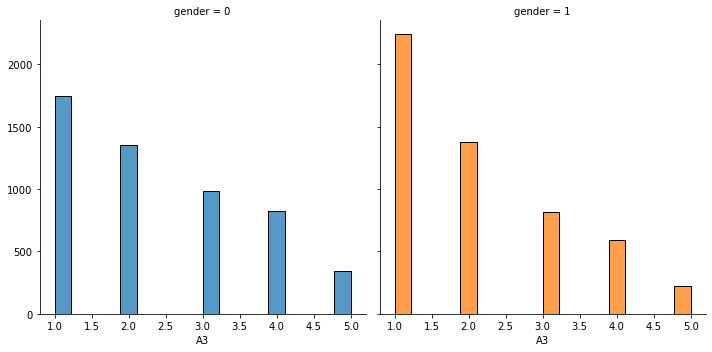

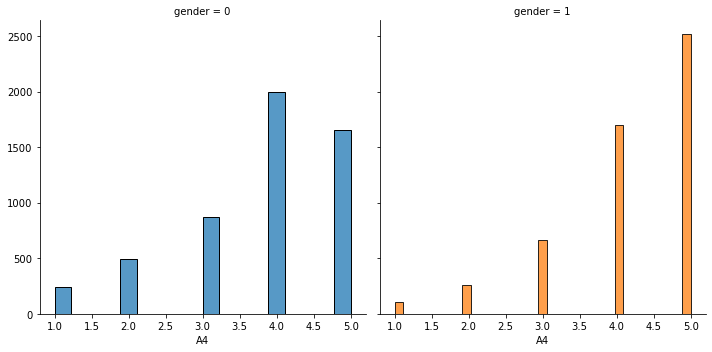

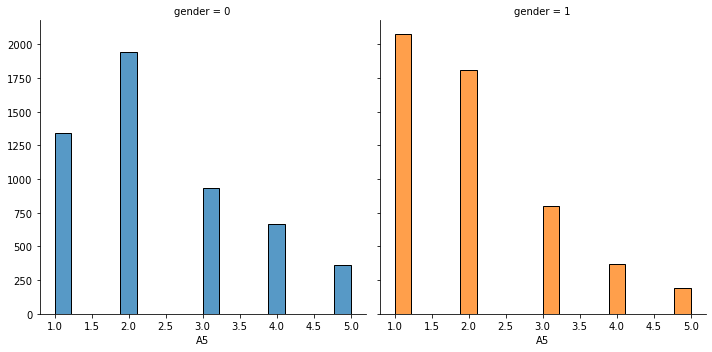

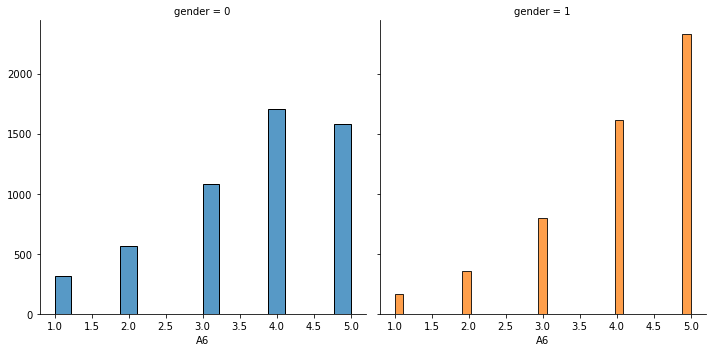

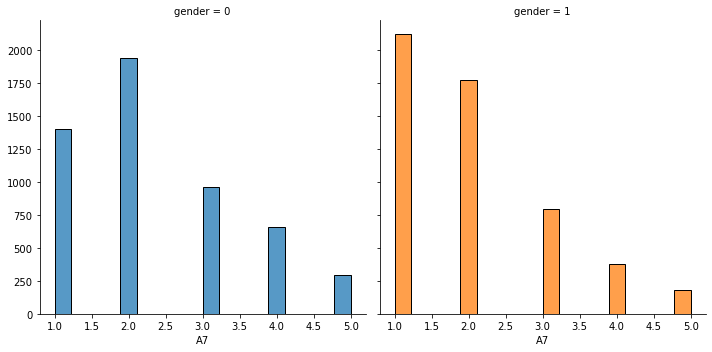

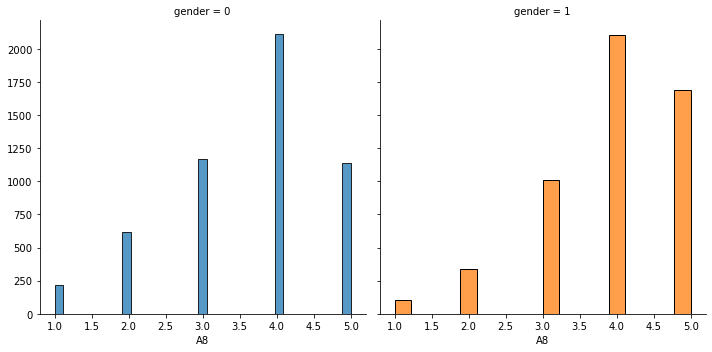

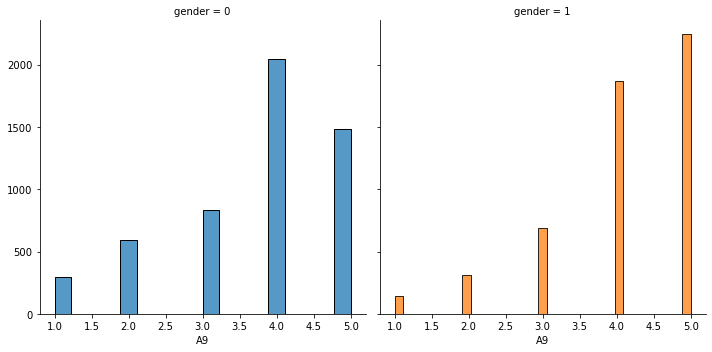

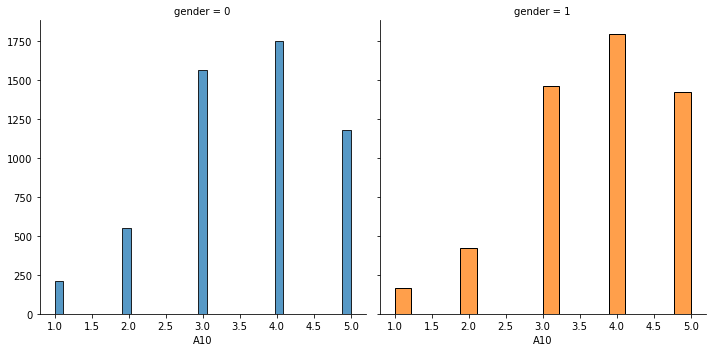

In [383]:
for i in range(10):
    s = 'A'+str(i+1)
    sns.FacetGrid(plot_d, col='gender',hue='gender', size=5).map(sns.histplot, s)

In [386]:
for i in range(10):
    s = 'A'+str(i+1)
    print(plot_d.loc[plot_d['gender']==0][s].mean()-plot_d.loc[plot_d['gender']==1][s].mean())

0.39120502569960003
-0.2272986864648776
0.28593184846754216
-0.36569579288025933
0.37426232628973954
-0.36455358842566143
0.3367599466971256
-0.3080144679230914
-0.3656957928802589
-0.14448886350656753
